Top 20 players based on Performance Index:
                     Player               Team  Performance Index  \
356           Mohamed Salah          Liverpool          16.497223   
556           Son Heung-min  Tottenham Hotspur          13.047641   
553              Harry Kane  Tottenham Hotspur          11.739780   
392         Kevin De Bruyne    Manchester City           9.290897   
359              Diogo Jota          Liverpool           8.439489   
629            Jarrod Bowen    West Ham United           8.085464   
394         Raheem Sterling    Manchester City           8.057849   
188             Mason Mount            Chelsea           7.974992   
423       Cristiano Ronaldo  Manchester United           7.644681   
354              Sadio Mané          Liverpool           7.607658   
322          James Maddison     Leicester City           7.407340   
396           Gabriel Jesus    Manchester City           6.804419   
0               Bukayo Saka            Arsenal           6.7

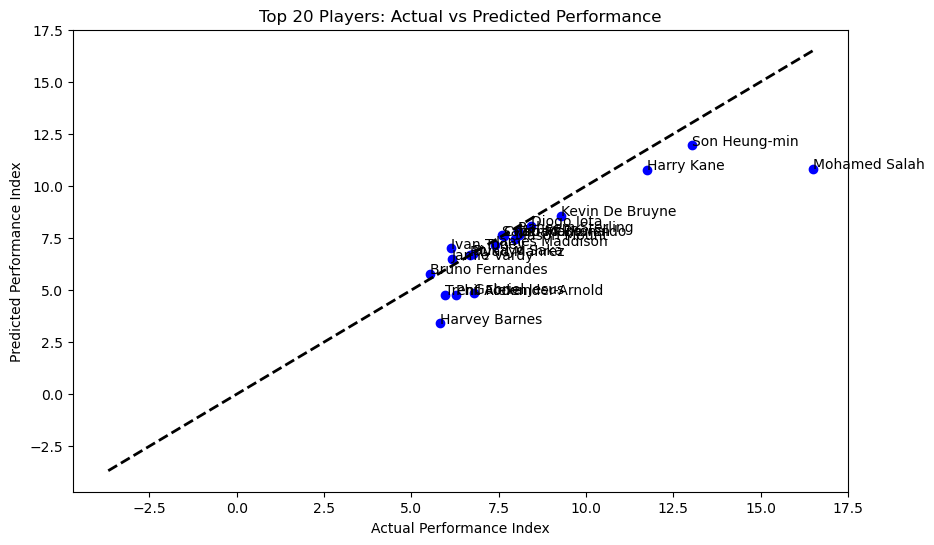

Top 5 current teams based on Performance Index:
Team
Manchester City      42.654137
Liverpool            41.759575
Chelsea              21.231095
Tottenham Hotspur    16.317985
West Ham United      10.016284
Name: Performance Index, dtype: float64
Top 5 future teams based on Predicted Performance:
Team
Manchester City      37.830619
Liverpool            32.197950
Chelsea              19.181102
Tottenham Hotspur    14.010981
West Ham United       7.176294
Name: Predicted Performance, dtype: float64


/var/folders/4v/wh3lsj_x59z9bpr3x98vp58c0000gn/T/ipykernel_6943/2045224519.py:71: UserWarning: Glyph 154 (\x9a) missing from current font.
  plt.tight_layout()
/Users/jaindra/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 154 (\x9a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


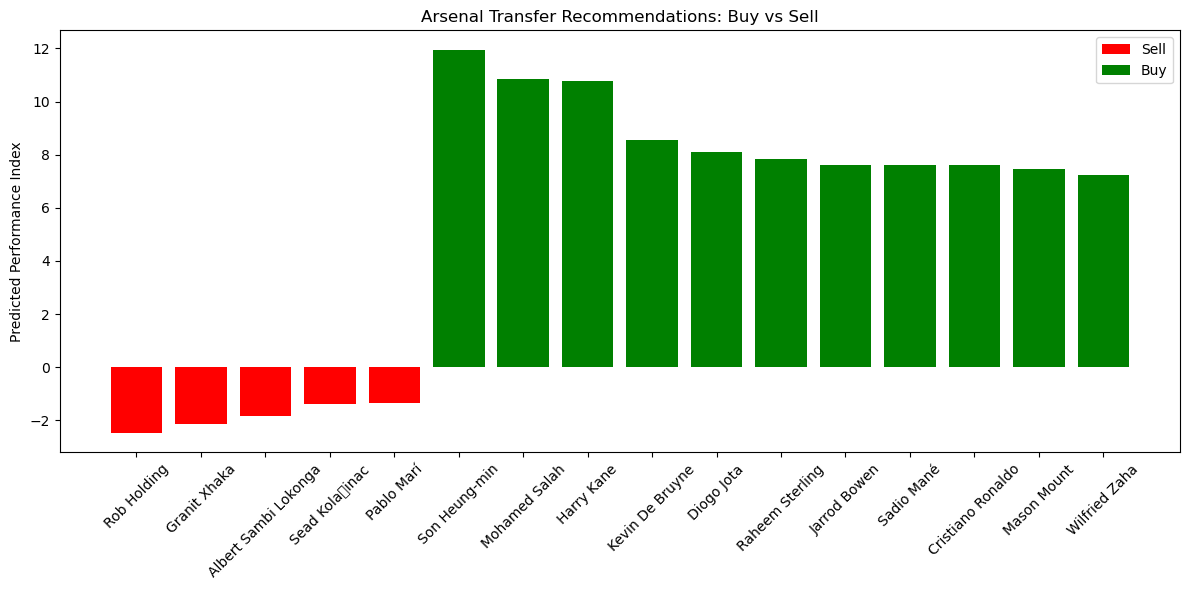

New predicted top 5 teams after transfers:
Team
Arsenal            106.477728
Manchester City     21.425774
Chelsea             11.727986
Leicester City       5.726555
Liverpool            5.641676
Name: Predicted Performance, dtype: float64


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

file_path = '/Users/jaindra/Desktop/hws/dspproject/Football Players Stats (Premier League 2021-2022).csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

data['Min'] = pd.to_numeric(data['Min'].str.replace(',', ''), errors='coerce')
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Composite Index Calculation
data['Performance Index'] = data['Gls'] + 0.6 * data['Ast'] + 0.4 * data['xG'] + 0.3 * data['xA'] - 0.5 * (data['CrdY'] + 0.5 * data['CrdR']) + 0.1 * data['Min']

# Model Training
features = ['Age', 'MP', 'Min', 'Gls', 'Ast', 'xG', 'xA', 'CrdY', 'CrdR']
X = data[features]
y = data['Performance Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
data['Predicted Performance'] = model.predict(X)

# Identify top 20 players
top_20_players = data.nlargest(20, 'Performance Index')
print("Top 20 players based on Performance Index:")
print(top_20_players[['Player', 'Team', 'Performance Index', 'Predicted Performance']])

plt.figure(figsize=(10, 6))
plt.scatter(top_20_players['Performance Index'], top_20_players['Predicted Performance'], color='blue')
for i, txt in enumerate(top_20_players['Player']):
    plt.annotate(txt, (top_20_players['Performance Index'].iloc[i], top_20_players['Predicted Performance'].iloc[i]))
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Top 20 Players: Actual vs Predicted Performance')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

# Current and future top 5 teams
team_performance = data.groupby('Team')['Performance Index'].sum().sort_values(ascending=False)
predicted_team_performance = data.groupby('Team')['Predicted Performance'].sum().sort_values(ascending=False)

print("Top 5 current teams based on Performance Index:")
print(team_performance.head(5))
print("Top 5 future teams based on Predicted Performance:")
print(predicted_team_performance.head(5))

# Arsenal strategy: players to sell and buy
arsenal_players = data[data['Team'] == 'Arsenal']
players_to_sell = arsenal_players.nsmallest(5, 'Predicted Performance')
top_potential_signings = data[data['Team'] != 'Arsenal'].nlargest(11, 'Predicted Performance')  # One per position

# Show sell vs buy player performance
plt.figure(figsize=(12, 6))
plt.bar(players_to_sell['Player'], players_to_sell['Predicted Performance'], color='red', label='Sell')
plt.bar(top_potential_signings['Player'], top_potential_signings['Predicted Performance'], color='green', label='Buy')
plt.ylabel('Predicted Performance Index')
plt.title('Arsenal Transfer Recommendations: Buy vs Sell')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Recalculate the top 5 teams assuming Arsenal transfers
data.loc[players_to_sell.index, 'Team'] = 'Free Agent'
data.loc[top_potential_signings.index, 'Team'] = 'Arsenal'
new_team_performance = data.groupby('Team')['Predicted Performance'].sum().sort_values(ascending=False)
new_top_teams = new_team_performance.head(5)

print("New predicted top 5 teams after transfers:")
print(new_top_teams)
